\


`easyXRD` has three main methods that are called before refinement:


- `load_xrd_data`
- `get_baseline`
- `load_phases`

Previous notebook (`03_advanced-part-1.ipynb`) explained these methods in detail.

In this notebook, we elaborate refinement related methods that are listed below:

- `setup_gsas2_refiner`
- `refine_background`
- `refine_instrument_parameters`
- `set_LeBail`
- `refine_strain_broadening`
- `refine_size_broadening`
- `refine_phase_fractions`
- `refine_preferred_orientation`
- `refine_site_property`




\


In [ ]:
# This clones easyXRD repo from GitHub
!! git clone --depth=1 https://github.com/MehmetTopsakal/easyXRD.git

# This clones easyXRD_examples repo from GitHub
!! git clone --depth=1 https://github.com/MehmetTopsakal/easyXRD_examples.git

# Although Google Colab environment has many packages pre-installed, we need a few more python packages to be installed.
# Lines below do all the necessary installs for us
!! pip install numpy==1.26.4
!! pip install pyFAI==2024.9.0
!! pip install fabio==2024.9.0
!! pip install pybaselines
!! pip install pymatgen
!! pip install mp_api
!! pip install ipympl

# Finally, we nedd to reset kernel for the new package installations to take effect
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

!! echo done

As in previous notebooks, we need to execute next cell (`Shift + Enter`) in order to run this notebook on Google Colab.

In [ ]:
# Now we can import easyXRD functions
import sys
sys.path += ["easyXRD"]
from easyxrd.core import exrd

%matplotlib widget
import matplotlib.pyplot as plt

plt.rcParams["figure.constrained_layout.use"] = True  # For better plots.

import os
import fabio
import pyFAI

pyFAI.use_opencl = False
import numpy as np


# change into data directory that is provided with easyXRD_examples repository
import os
os.chdir("easyXRD_examples/data")



Checking required packages:

---pyFAI package with version 2024.9.0 is available and can be imported 
---scipy package with version 1.15.2 is available and can be imported 
---xarray package with version 2025.3.1 is available and can be imported 
---pybaselines package with version 1.2.0 is available and can be imported 
---numpy package with version 1.26.4 is available and can be imported 
---ipympl package with version 0.9.7 is available and can be imported 
---pymatgen package with version 2025.4.10 is available and can be imported 
---pandas package with version 2.2.3 is available and can be imported 
---fabio package with version 2024.9.0 is available and can be imported 
---mp_api package with version 0.45.3 is available and can be imported 


Imported easyxrd with the following configuration:

easyxrd_scratch_path : /home/mt/.easyxrd_scratch
gsasii_lib_path : /home/mt/.easyxrd_scratch/GSAS-II/GSASII
mp_api_key : dHgNQRNYS..........


# setup_gsas2_refiner

Here we start with `setup_gsas2_refiner`. In a notebook cell you can get the signature of a method using `?`

In [ ]:
exrd.setup_gsas2_refiner?

Signature:
exrd.setup_gsas2_refiner(
    self,
    gsasii_lib_path=None,
    instprm_from_gpx=None,
    instprm_from_nc=None,
    instprm_Polariz=0,
    instprm_Azimuth=0,
    instprm_Zero=0,
    instprm_U=100,
    instprm_V=5,
    instprm_W=0.5,
    instprm_X=0,
    instprm_Y=0,
    instprm_Z=0,
    instprm_SHL=0.002,
    do_1st_refinement=True,
    yshift_multiplier=0.01,
    normalize=False,
    normalize_to=100,
    plot=True,
)
Docstring: <no docstring>
File:      ~/easyXRD/easyxrd/core.py
Type:      function

`gsasii_lib_path` is the directory that contains *.py files of GSAS-II.\
Usually, we don't need to set this keyword. In some cases, the code\
may ask the user to enter it. If one needs to use a different GSAS-II\
lib path, it can be set using this keyword.

For every refinement, GSAS-II requires instrument parameters which are\
stored in an .instprm file.

`instprm_from_gpx` keyword enables read of instrument parameters from\
an gpx file that was exported by easyXRD. Similarly, `instprm_from_nc`\
keyword enables read of instrument parameters from an nc file generated\
by easyXRD.

If no gpx or nc file are available to read instrument parameters, default\
values are set for instrument parameters (Polariz,Azimuth,Zero,U,W,V,X,Y,Z)\
SHL. easyXRD has a `refine_instrument_parameters` function to refine these\
parameters. It will be explained in next sections.

`do_1st_refinement=True` setting allows an initial refinement. It is good\
to set it `True` so that we can see the starting refinement. If phases\
are are totally wrong, it doesn't make sense to continue with further\
refinement steps.

In cells below, we demonstrate use of aforementioned keywords.

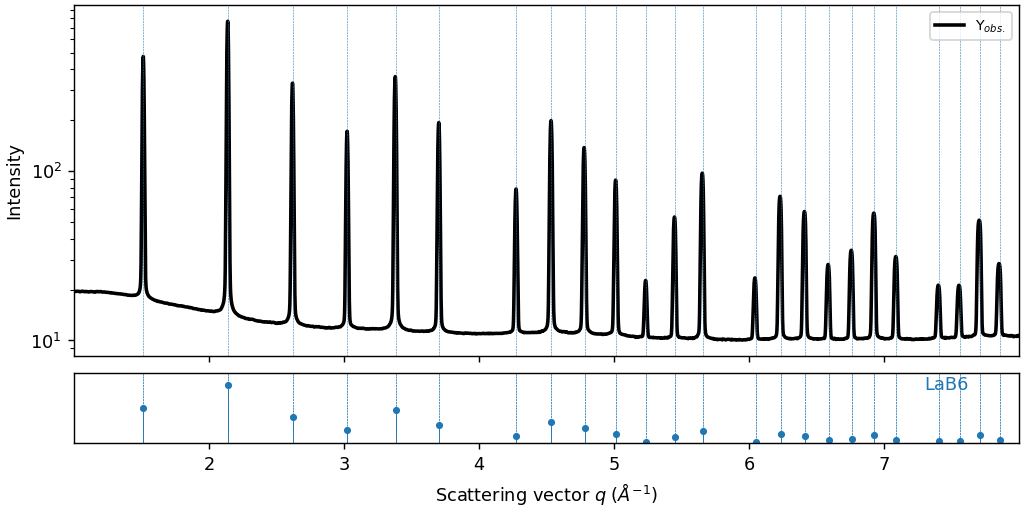

In [ ]:
# Here woad LaB6 data first.

sample = exrd(i1d_ylogscale=True, i2d_logscale=False)
sample.load_xrd_data(
    from_txt_file="LaB6/LaB6_synchrotron_XRD_from_28ID-2.xy",
    txt_file_wavelength_in_angstrom=0.1814,
    plot=False,radial_range=(1,8),
)
# sample.get_baseline(
#     input_bkg=None, iarpls_lam=1000000,plot=False
# )
sample.load_phases([{"cif": "LaB6/LaB6_structure_from_MaterialsProject.cif", "label": "LaB6"}])


 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 25.787/1.158 



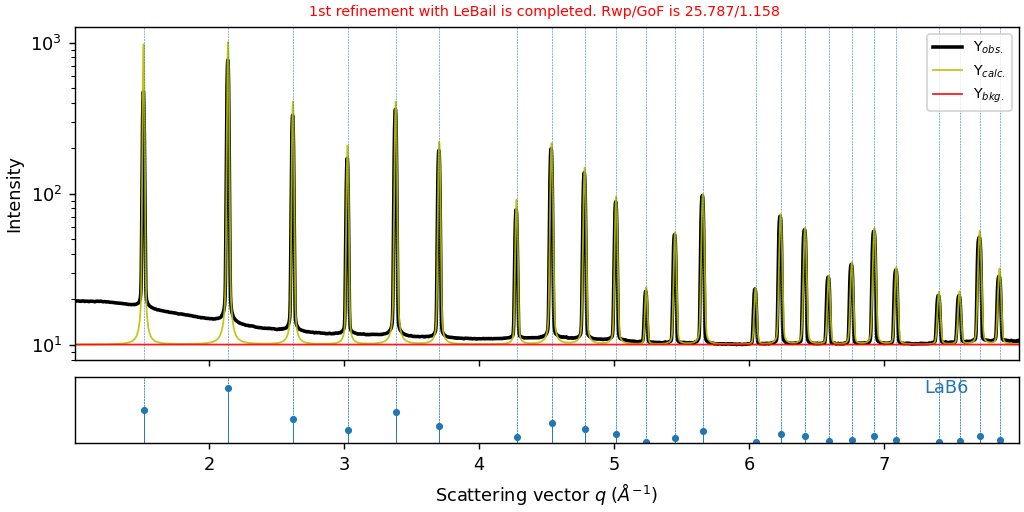

In [ ]:
sample.setup_gsas2_refiner(
    gsasii_lib_path=None,
    instprm_from_gpx=None,
    instprm_from_nc=None,
    instprm_Polariz=0,
    instprm_Azimuth=0,
    instprm_Zero=0,
    instprm_U=100,
    instprm_V=5,
    instprm_W=0.5,
    instprm_X=0,
    instprm_Y=0,
    instprm_Z=0,
    instprm_SHL=0.002,
    do_1st_refinement=True,
    yshift_multiplier=0.01,
    normalize=False,
    normalize_to=100,
    plot=True,
)


 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 25.787/1.158 


 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 25.787/1.158 



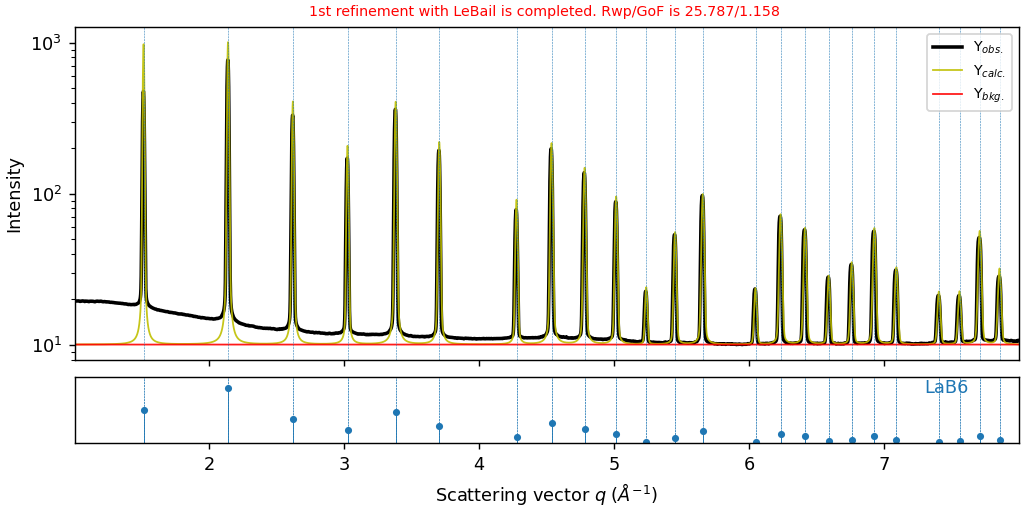

In [ ]:
# here we do a refinement and export a gpx file
sample.setup_gsas2_refiner(plot=False)
sample.export_gpx_to('LaB6_exported.gpx')

# then we read the previously exported gpx
sample.setup_gsas2_refiner(instprm_from_gpx='LaB6_exported.gpx')


 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 62.548/2.809 


 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 31.790/1.428 



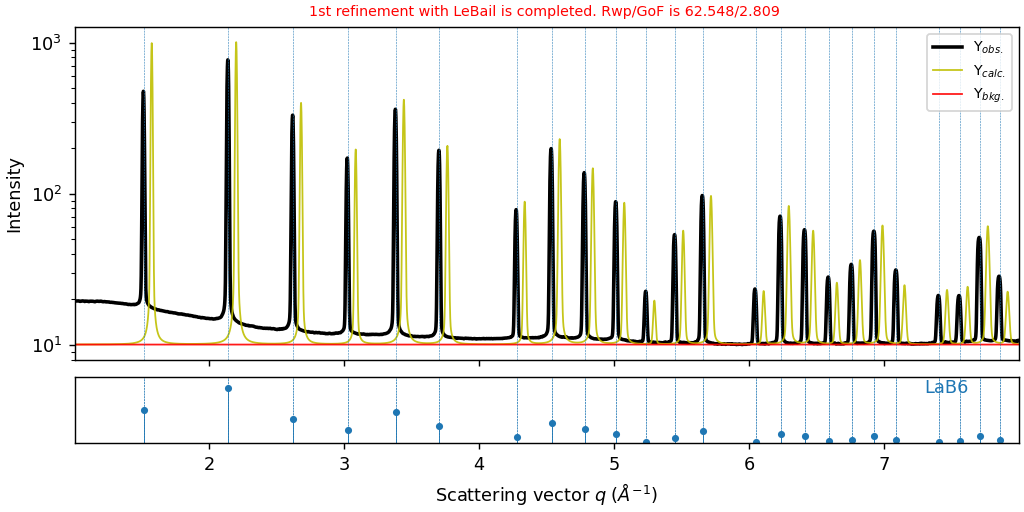

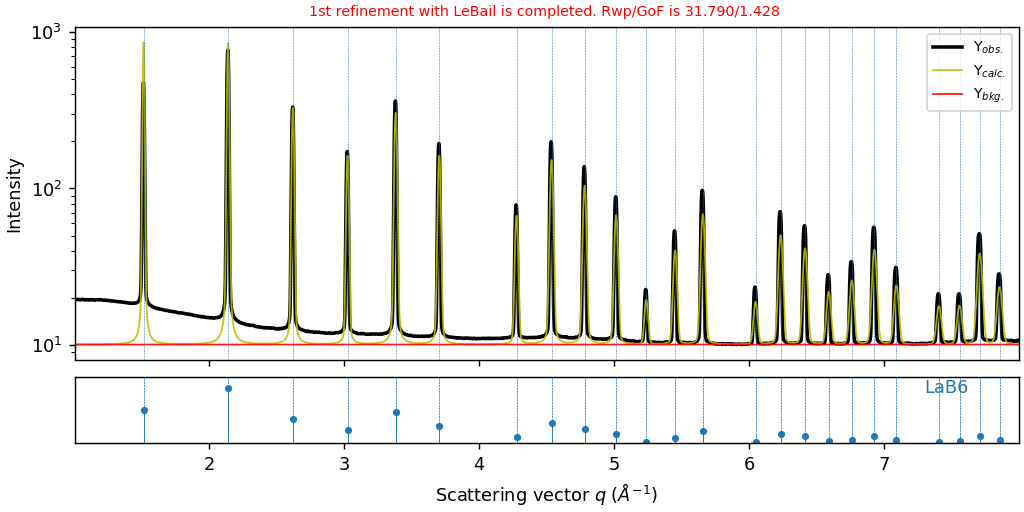

In [ ]:
# Here we set a different Zero instrument parameter.
# As a result, it gives totally different refinement.
sample.setup_gsas2_refiner(plot=True,instprm_Zero=0.1)

# Here we set a different U instrument parameter.
# As a result, it gives us a different refinement.
sample.setup_gsas2_refiner(plot=True,instprm_U=500)